# core

> Fill in a module description here

In [1]:
#| default_exp core

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| export
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff, integrate, parse_expr
import sympy
import numpy as np
import random
import math

In [4]:
#| export
from free_market import Free_market


supply function 0 + 1 * x
demand function 10 - 1 * x
cannot multiply variables with zero


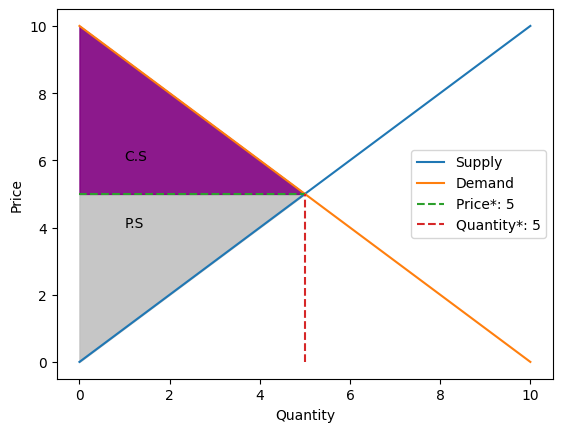

In [5]:

a = random.randint(1,5)
b = random.randint(5,10)
c = random.randint(1,5)
d = random.randint(0,1)

supply_function = f"{0} + {1} * x"
demand_function = f"{10} - {1} * x"
market = Free_market(supply_function, demand_function)


print(f"supply function {supply_function}\ndemand function {demand_function}")
market.get_graph(complete=True)

In [6]:
#| export

from monopoly import Monopoly
    


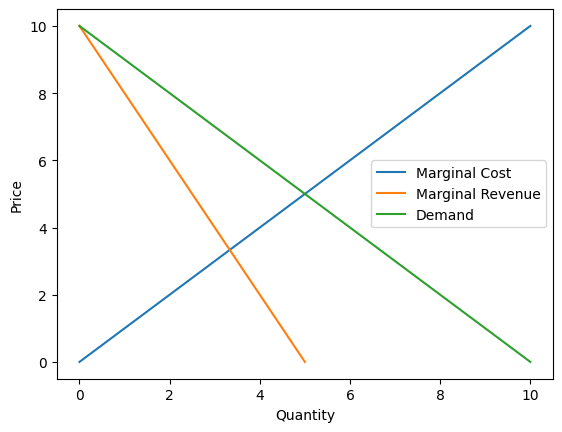

In [7]:
supply = "x"
demand = "10 -  x"
market = Monopoly(supply, demand)
market.get_graph(complete=False)

In [8]:
supply_function = " x*2"
demand_function = "1000 -  6*x"
market = Free_market(supply_function, demand_function)

In [9]:

consumer_surplus = market.get_consumer_surplus()
print("Consumer Surplus:", consumer_surplus)

producer_surplus = market.get_producer_surplus()
print("Producer Surplus:", producer_surplus)

economic_surplus = market.get_economic_surplus()

print("Economic Surplus:", economic_surplus)

Consumer Surplus: 46875
Producer Surplus: 15625
Economic Surplus: 62500


cannot multiply variables with zero


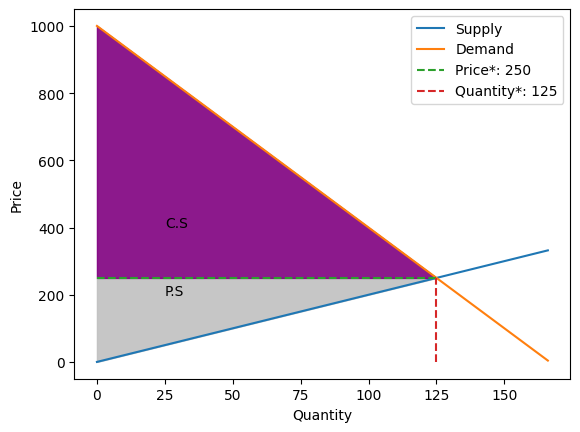

In [10]:
market.get_graph(complete=True)

In [11]:
price = market.get_price()
quantity = market.get_quantity()
print(f"Price: {price}, Quantity: {quantity}")

Price: 250, Quantity: 125


dead_loss_x_range is: [10/3, 4, 5, 6, 7, 8, 9]
demand_array is: [6.0, 5.0]
mc_array is: [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], price_free_market is: 5


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

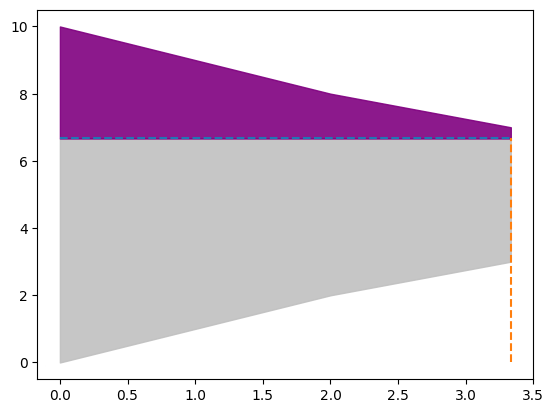

In [12]:

supply = "x"
demand = "10 - x"

market = Monopoly(supply, demand)

market.get_graph(complete=True)

In [ ]:

supply = "x"
demand = "10 - x"

market = Monopoly(supply, demand)

market.get_graph(complete=False)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()